# Modeling

## Author: Tilova Shahrin

- [Location Spatial Analysis](#locspatial)
- [Infraction Frequency Analysis](#inftime)

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

<a id='locspatial'></a>
### Location Spatial Analysis

We will utilize the location data to analyze spatial patterns of infractions. We can predict different features in different areas based on the location features `latitude` and `longitude`.

In [74]:
parking_df = pd.read_csv('../data/parking_df.csv')
parking_df.head()

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,province,datetime_of_infraction,latitude,longitude
0,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"1546 BLOOR ST W, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.656337,-79.453142
1,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"5418 YONGE ST, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.775587,-79.414671
2,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,OPP,"777 QUEEN ST W, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.646259,-79.408080
3,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"747 QUEEN ST E, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.659131,-79.348080
4,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"3042 DUNDAS ST W, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.665651,-79.470785


Let's make sure our dataframe has accurate coorinates, and not the filled 0.0 we did in the preprocessing. 

In [75]:
parking_df[parking_df['latitude'] != 0.0]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,province,datetime_of_infraction,latitude,longitude
0,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"1546 BLOOR ST W, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.656337,-79.453142
1,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"5418 YONGE ST, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.775587,-79.414671
2,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,OPP,"777 QUEEN ST W, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.646259,-79.408080
3,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"747 QUEEN ST E, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.659131,-79.348080
4,2016-12-30,403.0,STOP-SIGNED HIGHWAY-RUSH HOUR,150,16:37:00,N/S,"3042 DUNDAS ST W, TORONTO, ON, CANADA",ON,2016-12-30 16:37:00,43.665651,-79.470785
...,...,...,...,...,...,...,...,...,...,...,...
12942209,2022-12-12,8.0,STAND VEH.-PROHIBIT TIME/DAY,100,09:41:00,N/S,"160 FLOYD AVE, TORONTO, ON, CANADA",ON,2022-12-12 09:41:00,43.687567,-79.348356
12942217,2022-12-12,3.0,PARK ON PRIVATE PROPERTY,30,09:42:00,AT,"20 LOMBARD ST, TORONTO, ON, CANADA",ON,2022-12-12 09:42:00,43.651556,-79.376841
12942218,2022-12-12,367.0,STND ONSTRT ACCESSIBLE NO PRMT,450,09:42:00,N/S,"70 TEMPERANCE ST, TORONTO, ON, CANADA",ON,2022-12-12 09:42:00,43.650545,-79.382110
12942220,2022-12-12,3.0,PARK ON PRIVATE PROPERTY,30,09:43:00,AT,"2075 BAYVIEW AVE, TORONTO, ON, CANADA",ON,2022-12-12 09:43:00,43.721997,-79.372807


In [77]:
parking_coord = parking_df[parking_df['latitude'] != 0.0]

In [79]:
parking_coord.shape

(1721996, 11)

We have about 1.7 million coordinates compared to the total 12.9 million rows of data. 

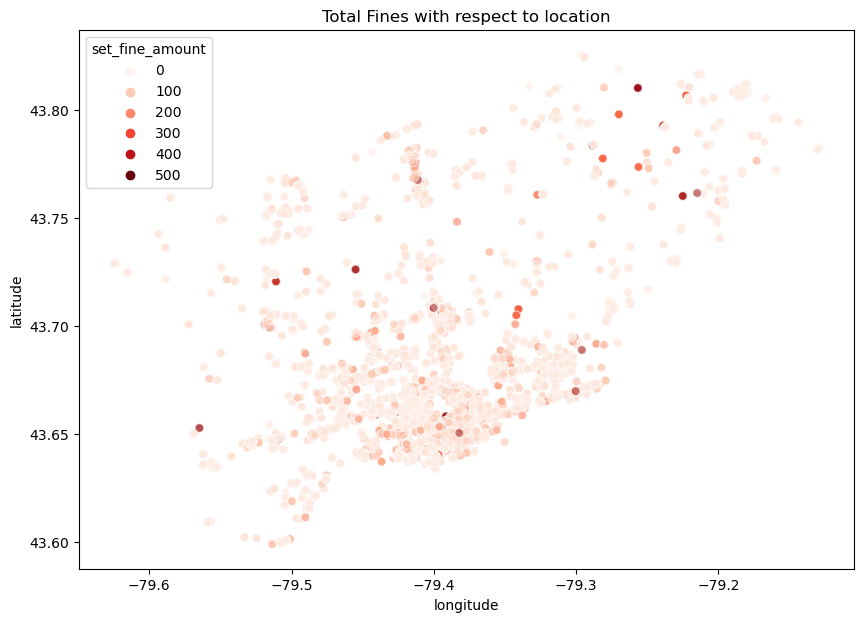

In [78]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=parking_coord, x="longitude", y="latitude", hue="set_fine_amount", palette="Reds", alpha=0.5)
plt.title("Total Fines with respect to location")
plt.show()

In [80]:
X = parking_coord[['latitude', 'longitude']]
y = parking_coord['set_fine_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's try and predict the fines by using KNeighborsRegressor.

In [82]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=73)

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Number of neighbours: ", 5)
print("-- R^2 train score: ", train_score)
print("-- R^2 test score: ", test_score)

Number of neighbours:  5
-- R^2 train score:  0.364016756990557
-- R^2 test score:  0.36561902256832113


Let's see if we can get a higher score by checking different n neighbors. I'm going to create a look of neighbors k ranging from 3-100 in 2s. We can get a visual representation after. 

The Mean Squared Error measures how close a regression line is to a set of data points. Basically a risk meter. We can see it is pretty far from zero so it would give us a pretty far prediction. 

In [83]:
train_scores = []
test_scores = []


for k in range(50, 100, 2):
    model = KNeighborsRegressor(n_neighbors=k)

    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print("Number of neighbours: ", k)
    print("-- train score: ", train_score)
    print("-- test score: ", test_score)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

Number of neighbours:  50
-- train score:  0.3614129382060022
-- test score:  0.36285780696967906
Number of neighbours:  52
-- train score:  0.361942946727431
-- test score:  0.3633664902775525
Number of neighbours:  54
-- train score:  0.36171278024467
-- test score:  0.3630645397334217
Number of neighbours:  56
-- train score:  0.36179450044431505
-- test score:  0.36310826706975274
Number of neighbours:  58
-- train score:  0.3619177350774643
-- test score:  0.3634239904367871
Number of neighbours:  60
-- train score:  0.36237181320349954
-- test score:  0.363995868987096
Number of neighbours:  62
-- train score:  0.3629880005250944
-- test score:  0.3645753405895453
Number of neighbours:  64
-- train score:  0.36366905311464814
-- test score:  0.3654759328025693


KeyboardInterrupt: 

Looks like knn with 73 neighbors gives me the best R^2 score. 

<a id='inftime'></a>
### Infraction Frequency Analysis